Number of Omega-automaton states (including the trap state): 6
Number of accepting pairs: 2


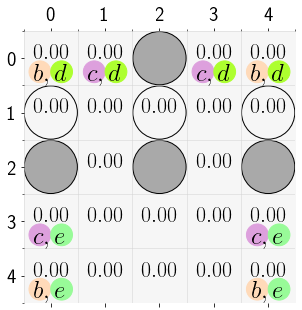

In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np

# Specification
ltl = 'G F b & G F c & (F G d | F G e) & G !a'
oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
print('Number of accepting pairs:',oa.shape[0])
display(oa)

# MDP Description
shape = (5,5)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'B',  'E',  'E'],
    ['T',  'E',  'T',  'E',  'T'],
    ['B',  'E',  'B',  'E',  'B'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E']
])

label = np.array([
    [('b','d'),('c','d'),(),('c','d'),('b','d')],
    [(),       (),       (),       (),       ()],
    [(),       (),       (),       (),       ()],
    [('c','e'),(),       (),       (),('c','e')],
    [('b','e'),(),       (),       (),('b','e')]
],dtype=np.object)

reward = np.zeros(shape)
lcmap={
    'b':'peachpuff',
    'c':'plum',
    'd':'greenyellow',
    'e':'palegreen'
}

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=5,adversary=('a',),lcmap=lcmap,p=0.6)  # Use figsize=4 for smaller figures
grid_mdp.plot()

# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [2]:
Q,Q_=csrl.minimax_q(T=2**10,K=2**20,start=(0,3),start_=(4,1))

In [3]:
# Calculate the policy
policy = np.argmax(Q,axis=-1)
policy_ = np.argmin(Q_,axis=-1)
value = np.max(Q,axis=-1)
value_ = np.min(Q_,axis=-1)

_value = np.copy(value)
_policy = np.copy(policy)
_value[:] = np.max(value,axis=0)
_policy[:] = np.argmax(value,axis=0)

ind = (csrl.discountC*_value) > value
policy[ind] = _policy[ind] + len(csrl.mdp.A)

In [5]:
csrl.plot(policy=policy,value=value)

interactive(children=(IntSlider(value=0, description='i', max=1), IntSlider(value=0, description='q', max=5), …

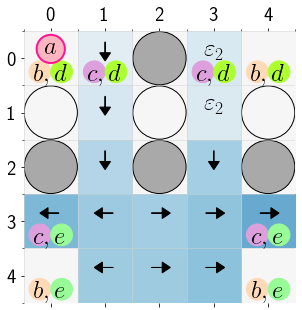

In [6]:
csrl.plot(value=value,policy=policy,iq=(0,2),rc_=(0,0),agent_=(0,0),save='adversary_0_0.pdf')

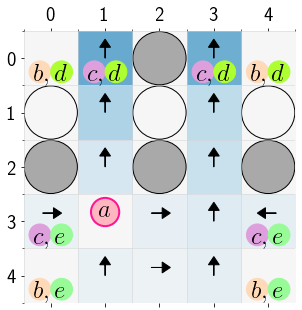

In [7]:
csrl.plot(value=value,policy=policy,iq=(1,2),rc_=(3,1),agent_=(3,1),save='adversary_3_1.pdf')